In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
master_df = pd.read_csv('/content/drive/MyDrive/Food_del_dataset/train.csv')
master_df.head(10)
# (master_df['Vehicle_condition']).unique()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
# Checking for null values in the unmodified dataset

master_df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Data Preprocessing

In [ ]:
# Finding all types of null values, storing in set null_types

master_df = master_df.astype(str) # converting dataframe to string

null_types = set()

for column in master_df.columns:
  unique_vals = master_df[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'conditions NaN', 'NaN '}


In [ ]:
# Correcting null values to np.nan

for na_value in null_types:
  master_df.replace(na_value, np.nan, inplace = True)


In [ ]:
# Counting null values again

master_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [ ]:
# removing whitespaces from either sides

master_df = master_df.apply(lambda x: x.str.strip())
master_df.drop(columns= master_df.columns[0], inplace = True)

In [ ]:
# Data imputation using KNN-Imputer
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer()
master_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]
master_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"""

"\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer()\nmaster_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]\nmaster_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"

In [ ]:
# Dropping rows containing null values

master_df.dropna(inplace = True)

## Data Wrangling

In [ ]:
master_df['Weatherconditions'] = master_df['Weatherconditions'].str.split(" ", expand=True)[1]

master_df['Time_taken(min)'] = master_df['Time_taken(min)'].str.split(" ", expand=True)[1]

In [ ]:
# Converting columns to correct data-type

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']

## Converting numerical columns to float
for col in num_cols:
    master_df[col] = master_df[col].astype('float64')

## Converting Order_Date column to datetime date format
master_df['Order_Date'] = pd.to_datetime(master_df['Order_Date'], format = "%d-%m-%Y")

master_df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26.0


In [ ]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lab = le.fit_transform(master_df['Delivery_person_ID'])

In [ ]:
# one hot encoding
encoded_df = master_df.copy()

encoded_df = pd.get_dummies(encoded_df ,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                                  'Type_of_vehicle', 'City'])
encoded_df = pd.get_dummies(encoded_df ,columns = ['Festival'], drop_first=True)
encoded_df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Festival_Yes
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,0,0,1,0,1,0,0,0,1,0
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,0,0,1,0,0,1,1,0,0,0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,1,0,0,0,1,0,0,0,1,0
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,0,0,0,0,1,0,1,0,0,0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,...,0,1,0,0,1,0,1,0,0,0
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,...,0,0,0,0,1,0,1,0,0,0
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,...,1,0,0,0,0,1,1,0,0,0
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,...,0,0,1,0,1,0,1,0,0,0


## Adding useful features

In [ ]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

# creating new column filled with zeroes
master_df['distance_km'] = np.zeros(master_df.shape[0])

print(master_df)

restaurant_cordinates = master_df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = master_df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# calculating and filling in distance
for i in range(master_df.shape[0]):
    master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km

# Dropping lat long columns
master_df = master_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] )

In [ ]:
# Cleaning column 'distance_km'

# Converting to string to remove ' km'
master_df['distance_km'] = master_df['distance_km'].astype(str).str[:-3].replace('',0)

# Converting to float and rounding off
master_df['distance_km'] = master_df['distance_km'].astype(float).round(2)

In [ ]:
# We check for anomalous distance values

threshold_dist = 25
print(f"Number of deliveries with distance more than {threshold_dist} km =",
      master_df[master_df['distance_km'] > 25]['distance_km'].count())

print(f"Number of deliveries with distance 0 =",
      master_df[master_df['distance_km'] == 0]['distance_km'].count())

Number of deliveries with distance more than 25 km = 131
Number of deliveries with distance 0 = 3835


In [ ]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = master_df[(master_df['distance_km'] == 0) | (master_df['distance_km'] > 25)].index

master_df.drop(index_to_drop, inplace = True)

In [ ]:
# Adding column for avg_speed

master_df['avg_speed_kmph'] = round(master_df['distance_km']*60 / master_df['Time_taken(min)'])

## Exploratory Data Analysis

In [ ]:
# Doing EDA on a copy of the master dataframe

edal_df = master_df.copy()

<ipython-input-60-b1816957054d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)


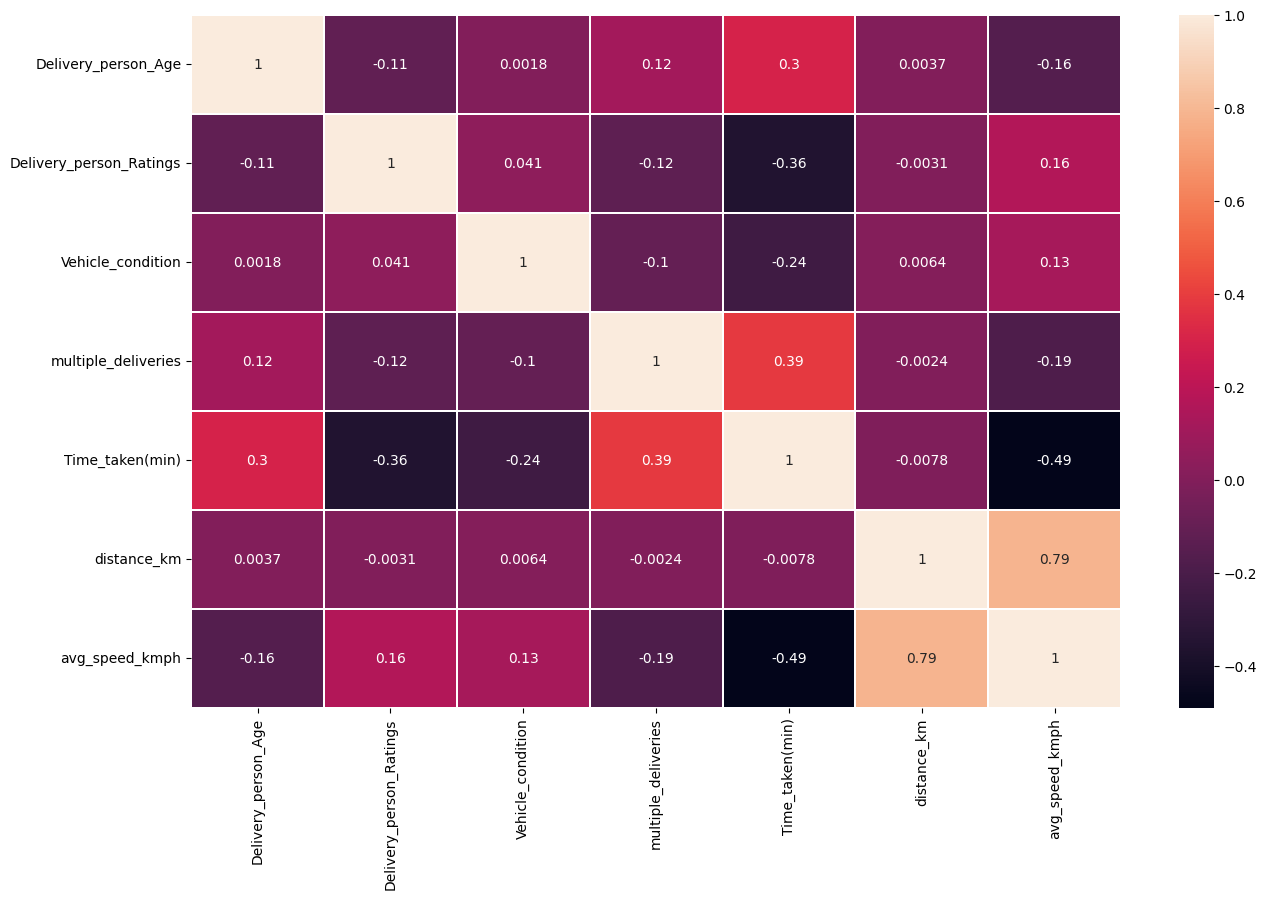

In [ ]:
# Correlation HeatMap

plt.figure(figsize=(15,9))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

In [ ]:
# Pair Plots

# sns.pairplot(edal_df)

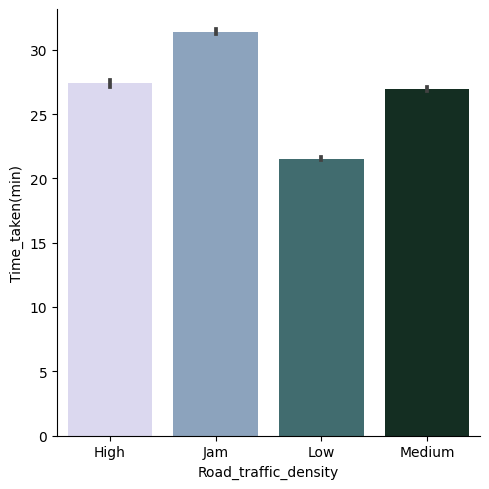

In [ ]:
sns.catplot(x="Road_traffic_density",
            y="Time_taken(min)",
            kind="bar",
            palette="ch:5",
            data=edal_df)

In [ ]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 28.79 kmph
Average speed of persons above 30: 21.7 kmph


# Insight: The average delivery speed of delivery persons under the age of 30 is about 25% more than of those above the age of 30

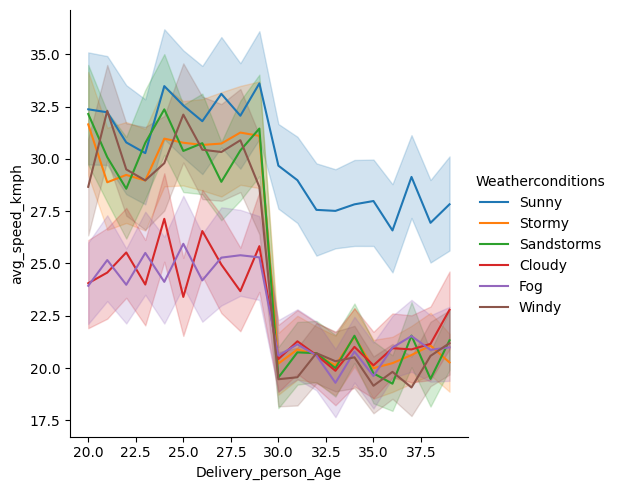

In [ ]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weatherconditions',kind = 'line')

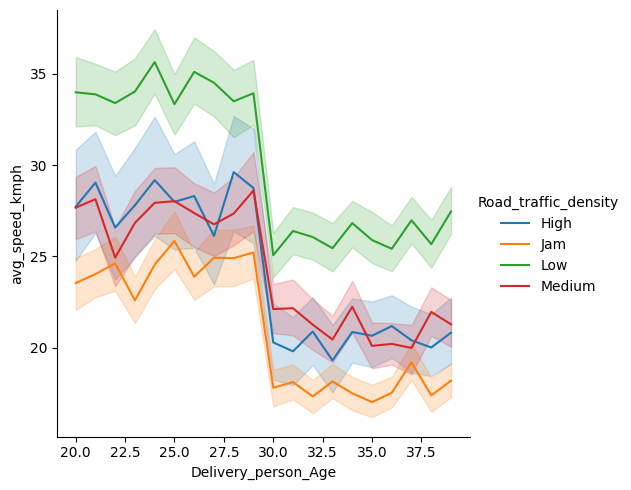

In [ ]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

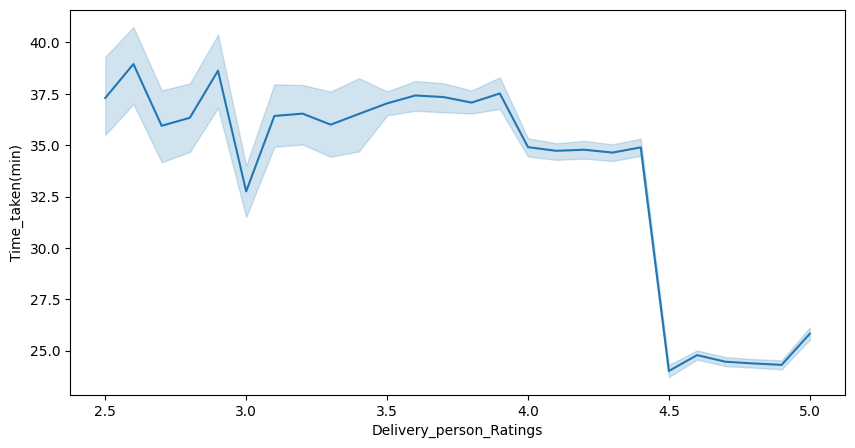

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=edal_df)
plt.show()

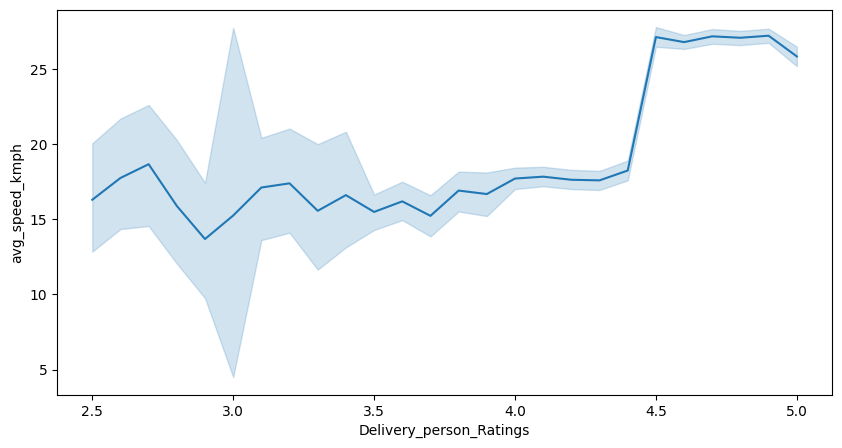

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="avg_speed_kmph", data=edal_df)
plt.show()

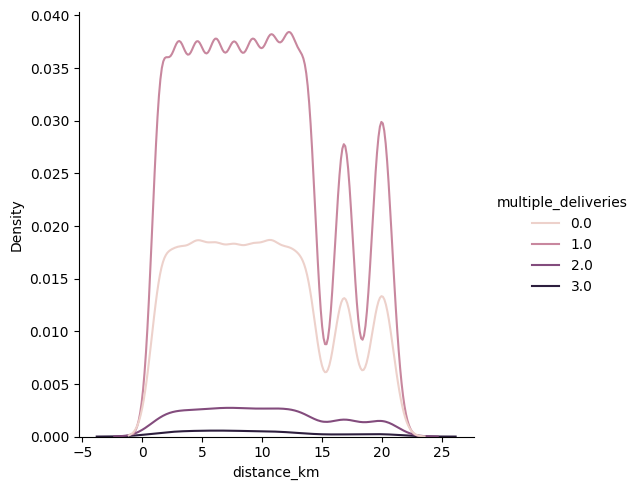

In [ ]:
sns.displot(hue='multiple_deliveries',data=edal_df,kind='kde', x = 'distance_km')

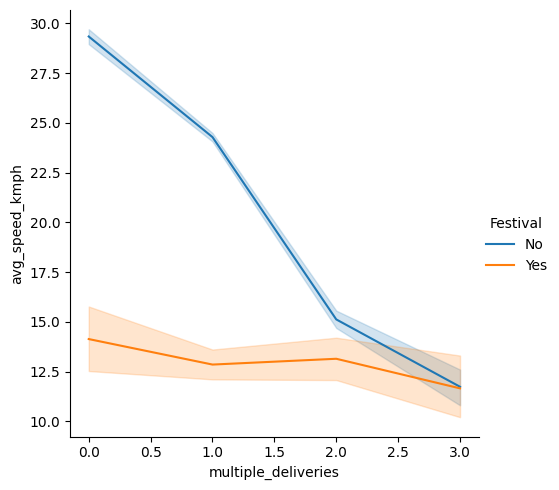

In [ ]:
sns.relplot(data = edal_df, x = 'multiple_deliveries', y = 'avg_speed_kmph',hue='Festival',kind = 'line')

In [ ]:
#  Sunny vs Storms vs Winds/Fog

edal_df[edal_df['Weatherconditions'] == 'Sunny']['avg_speed_kmph'].mean()

30.074092741935484

In [ ]:
edal_storms = edal_df.loc[(edal_df['Weatherconditions'] == 'Stormy') | (edal_df['Weatherconditions'] == 'Sandstorms')]
print(edal_storms['Weatherconditions'].unique())
edal_storms['avg_speed_kmph'].mean()

['Stormy' 'Sandstorms']


25.351489497643957

In [ ]:
edal_not_storms = edal_df.loc[(edal_df['Weatherconditions'] != 'Stormy') & (edal_df['Weatherconditions'] != 'Sandstorms')
                                 & (edal_df['Weatherconditions'] != 'Sunny')]
print(edal_not_storms['Weatherconditions'].unique())
edal_not_storms['avg_speed_kmph'].mean()

['Cloudy' 'Fog' 'Windy']


23.51201859580538

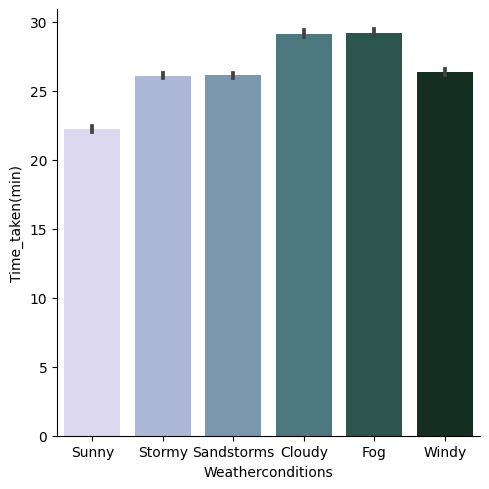

In [ ]:
# Catplot: Delivery Time v/s Weather Conditions

sns.catplot(data=edal_df, x="Weatherconditions", y="Time_taken(min)", kind="bar", palette="ch: 5",)

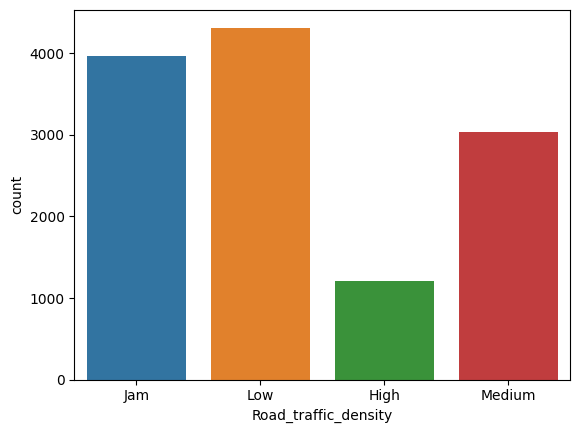

In [ ]:
sns.countplot(data = edal_storms, x = 'Road_traffic_density')
plt.show()

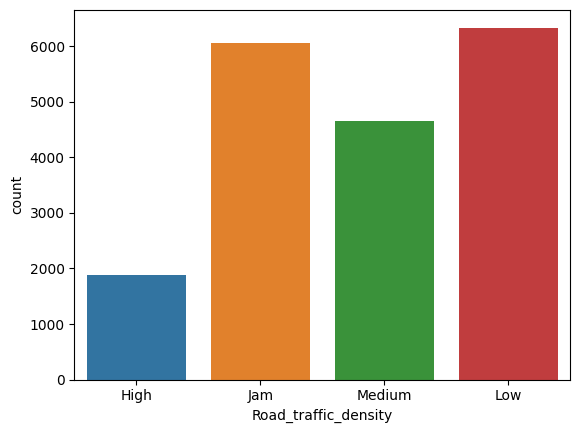

In [ ]:
sns.countplot(data = edal_not_storms, x = 'Road_traffic_density')
plt.show()

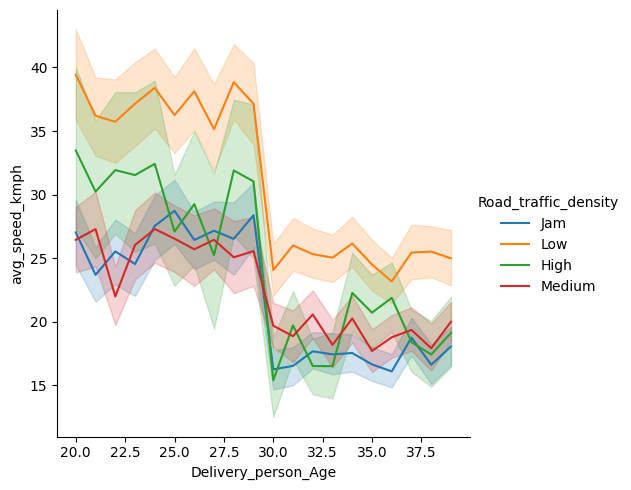

In [ ]:
sns.relplot(data = edal_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

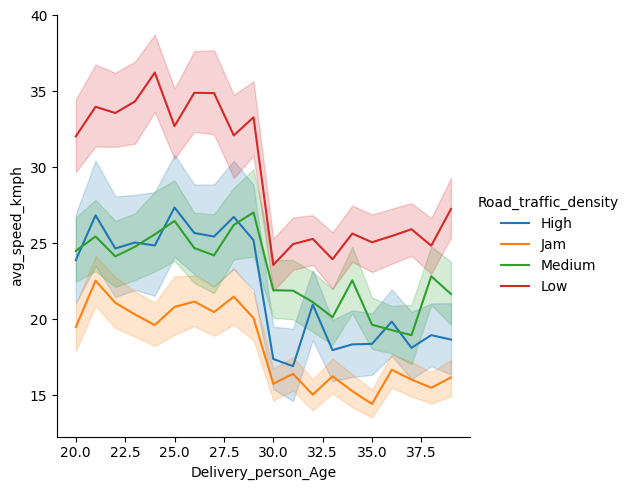

In [ ]:
sns.relplot(data = edal_not_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

## PDSL

In [ ]:
pdsl_df = master_df.copy()
print(master_df.columns)
pdsl_df = pdsl_df.drop(columns = ['Delivery_person_ID','Order_Date'] )
pdsl_df.head()

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'distance_km', 'avg_speed_kmph'],
      dtype='object')


,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,avg_speed_kmph
0,37.0,4.9,11:30:00,11:45:00,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.02,8.0
1,34.0,4.5,19:45:00,19:50:00,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.14,37.0
2,23.0,4.4,08:30:00,08:45:00,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.55,4.0
3,38.0,4.7,18:00:00,18:10:00,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.77,22.0
4,32.0,4.6,13:30:00,13:45:00,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.20,12.0


In [ ]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')

0 -- bad, 1 - good, 2-better, 3-best -- vehicle condition

In [ ]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)
pdsl_df

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),distance_km,avg_speed_kmph,Weatherconditions_Cloudy,...,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Festival_Yes
0,37.0,4.9,11:30:00,11:45:00,2.0,0.0,24.0,3.02,8.0,0,...,0,0,1,0,1,0,0,0,1,0
1,34.0,4.5,19:45:00,19:50:00,2.0,1.0,33.0,20.14,37.0,0,...,0,0,1,0,0,1,1,0,0,0
2,23.0,4.4,08:30:00,08:45:00,0.0,1.0,26.0,1.55,4.0,0,...,1,0,0,0,1,0,0,0,1,0
3,38.0,4.7,18:00:00,18:10:00,0.0,1.0,21.0,7.77,22.0,0,...,0,0,0,0,1,0,1,0,0,0
4,32.0,4.6,13:30:00,13:45:00,1.0,1.0,30.0,6.20,12.0,1,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41362,35.0,4.6,11:00:00,11:10:00,2.0,1.0,24.0,16.58,41.0,0,...,1,0,0,0,1,0,1,0,0,0
41363,33.0,5.0,11:10:00,11:25:00,0.0,0.0,27.0,1.49,3.0,0,...,0,1,0,0,1,0,1,0,0,0
41364,22.0,4.7,23:00:00,23:10:00,0.0,0.0,20.0,10.98,33.0,0,...,1,0,0,0,1,0,1,0,0,0
41365,35.0,3.6,21:30:00,21:45:00,2.0,1.0,31.0,4.65,9.0,0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
features = pdsl_df.drop(['Time_taken(min)', 'Time_Orderd', 'Time_Order_picked'], axis=1)
label = pdsl_df['Time_taken(min)'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
x_train

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance_km,avg_speed_kmph,Weatherconditions_Cloudy,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,...,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Festival_Yes
40132,38.0,4.8,1.0,2.0,9.16,11.0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
24321,39.0,4.3,2.0,1.0,10.74,20.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
35654,28.0,4.6,0.0,1.0,6.07,8.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
831,38.0,5.0,0.0,0.0,4.65,11.0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
14522,37.0,4.5,1.0,1.0,13.39,38.0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18551,25.0,4.5,0.0,0.0,6.28,25.0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
6950,22.0,4.6,0.0,1.0,1.50,3.0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
12457,21.0,4.8,1.0,1.0,12.40,41.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
946,24.0,4.6,0.0,1.0,4.59,13.0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26181, 27) (11221, 27) (26181,) (11221,)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt



model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr,
          'Decision Tree Regressor': model_dtr}

for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  75.80354900679541
Accuracy in testing dataset:  75.50097200868403
RMSE value:  4.598228302529669
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.63852018164296
Accuracy in testing dataset:  97.55581315967031
RMSE value:  1.4523901805555766
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  93.92322717447816
Accuracy in testing dataset:  93.64231385638567
RMSE value:  2.3424247360049697
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.99995633967362
Accuracy in testing dataset:  95.212072450231
RMSE value:  2.032777702673333
--------------------------------------


In [ ]:
#Hence the best model is Random Forest Regressor
# lowest rmse and highest acc on testing data
print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Accuracy in training dataset:  99.63852018164296
Accuracy in testing dataset:  97.55581315967031
RMSE value:  2.032777702673333


,Delivery_person_Ratings,actual,predicted
13817,3.8,33.0,33.57
23572,4.4,19.0,18.18
37698,4.6,31.0,30.60
8710,4.3,34.0,33.95
24591,4.6,34.0,40.56
4294,4.6,12.0,12.36
7189,4.0,42.0,40.77
25655,4.5,17.0,17.00
37985,3.7,44.0,43.59
22368,4.8,48.0,42.14


Time taken by drivers with rating 4+ on festival and non-festival days

<Axes: xlabel='Festival', ylabel='Time_taken(min)'>

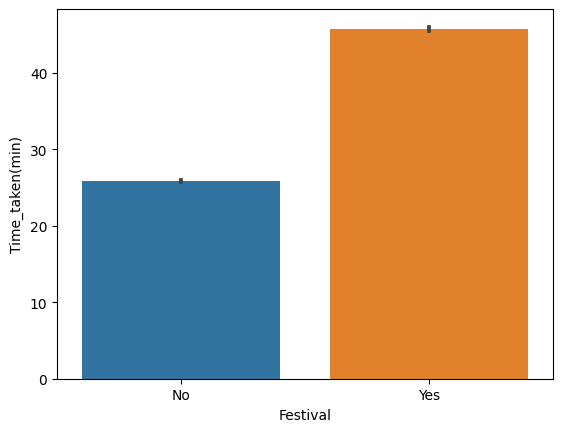

In [ ]:
rating_4_plus = master_df[master_df['Delivery_person_Ratings'] >= 4]

sns.barplot(x = 'Festival', y = 'Time_taken(min)', data = rating_4_plus)

In [ ]:
rating_4_plus[ rating_4_plus['Festival'] == 'Yes']['Time_taken(min)'].mean()

45.69565217391305

In [ ]:
rating_4_plus[ rating_4_plus['Festival'] == 'No']['Time_taken(min)'].mean()

25.850828573840136